<a href="https://colab.research.google.com/github/Navatwrone/cyclone_thermodynamics/blob/develop%2FNS/topografia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importando o conjunto dados, temos:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math as mt
import glob
import os
import seaborn
import xarray as xr

In [ ]:
# percorrendo o diretório e pegando somente os arquivos que possuem o formato .nc
caminho = '/content/pasta_teste'
dados = glob.glob(os.path.join(caminho, '*.nc'))

In [ ]:
def recorte (dados, data_1, data_2):
  for i in dados:
    df = xr.open_dataarray(i)
    df = df.sel(time = slice(data_1, data_2))
    return xr.df_tonetcdf('novo_arquivo')

def verifica(dados, tempo):
  lista = []
  for i in dados:
    if i.shape != (30, 60):
      lista.append(i)
      return lista

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

✨🍰✨ Everything looks OK!


In [ ]:
#!conda install pygmt
!conda install --channel conda-forge pygmt

Channels:
 - conda-forge
Platform: linux-64
Solving environment: | / - \ done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.3
    latest version: 25.5.1

Please update conda by running

    $ conda update -n base -c conda-forge conda



# All requested packages already installed.



In [ ]:
#https://github.com/andrebelem/pythonverse/blob/main/PyGMT_on_COLAB.ipynb
# because I like to enjoy my coffee in silence (3 runs averaged 8 minutes to install everything ! keep drinking your coffee)
%%capture
!sudo apt update
!sudo apt upgrade -y
!sudo apt install -y build-essential cmake libcurl4-gnutls-dev libnetcdf-dev gdal-bin libgdal-dev libfftw3-dev libpcre3-dev liblapack-dev libblas-dev libglib2.0-dev ghostscript ghostscript-x graphicsmagick ffmpeg xdg-utils
!git clone --depth 50 https://github.com/GenericMappingTools/gmt
!cmake /content/gmt
!cmake --build . --target install


In [ ]:
!pip install pygmt

In [ ]:
mamba install --channel conda-forge pygmt

SyntaxError: invalid syntax (ipython-input-10-3641468409.py, line 1)

In [ ]:
import pygmt
import glob
import os

In [ ]:
def buscar():
  """
  Retorna a lista de arquivo netcdf em um diretório contande diversos arquivos
  """
  caminho = '/content/test'
  arquivos = glob.glob(os.path.join(caminho, '*.nc'))
  return arquivos

def verificar(arquivo, lista):
  arquivos = buscar()
  for arquivo in arquivos:



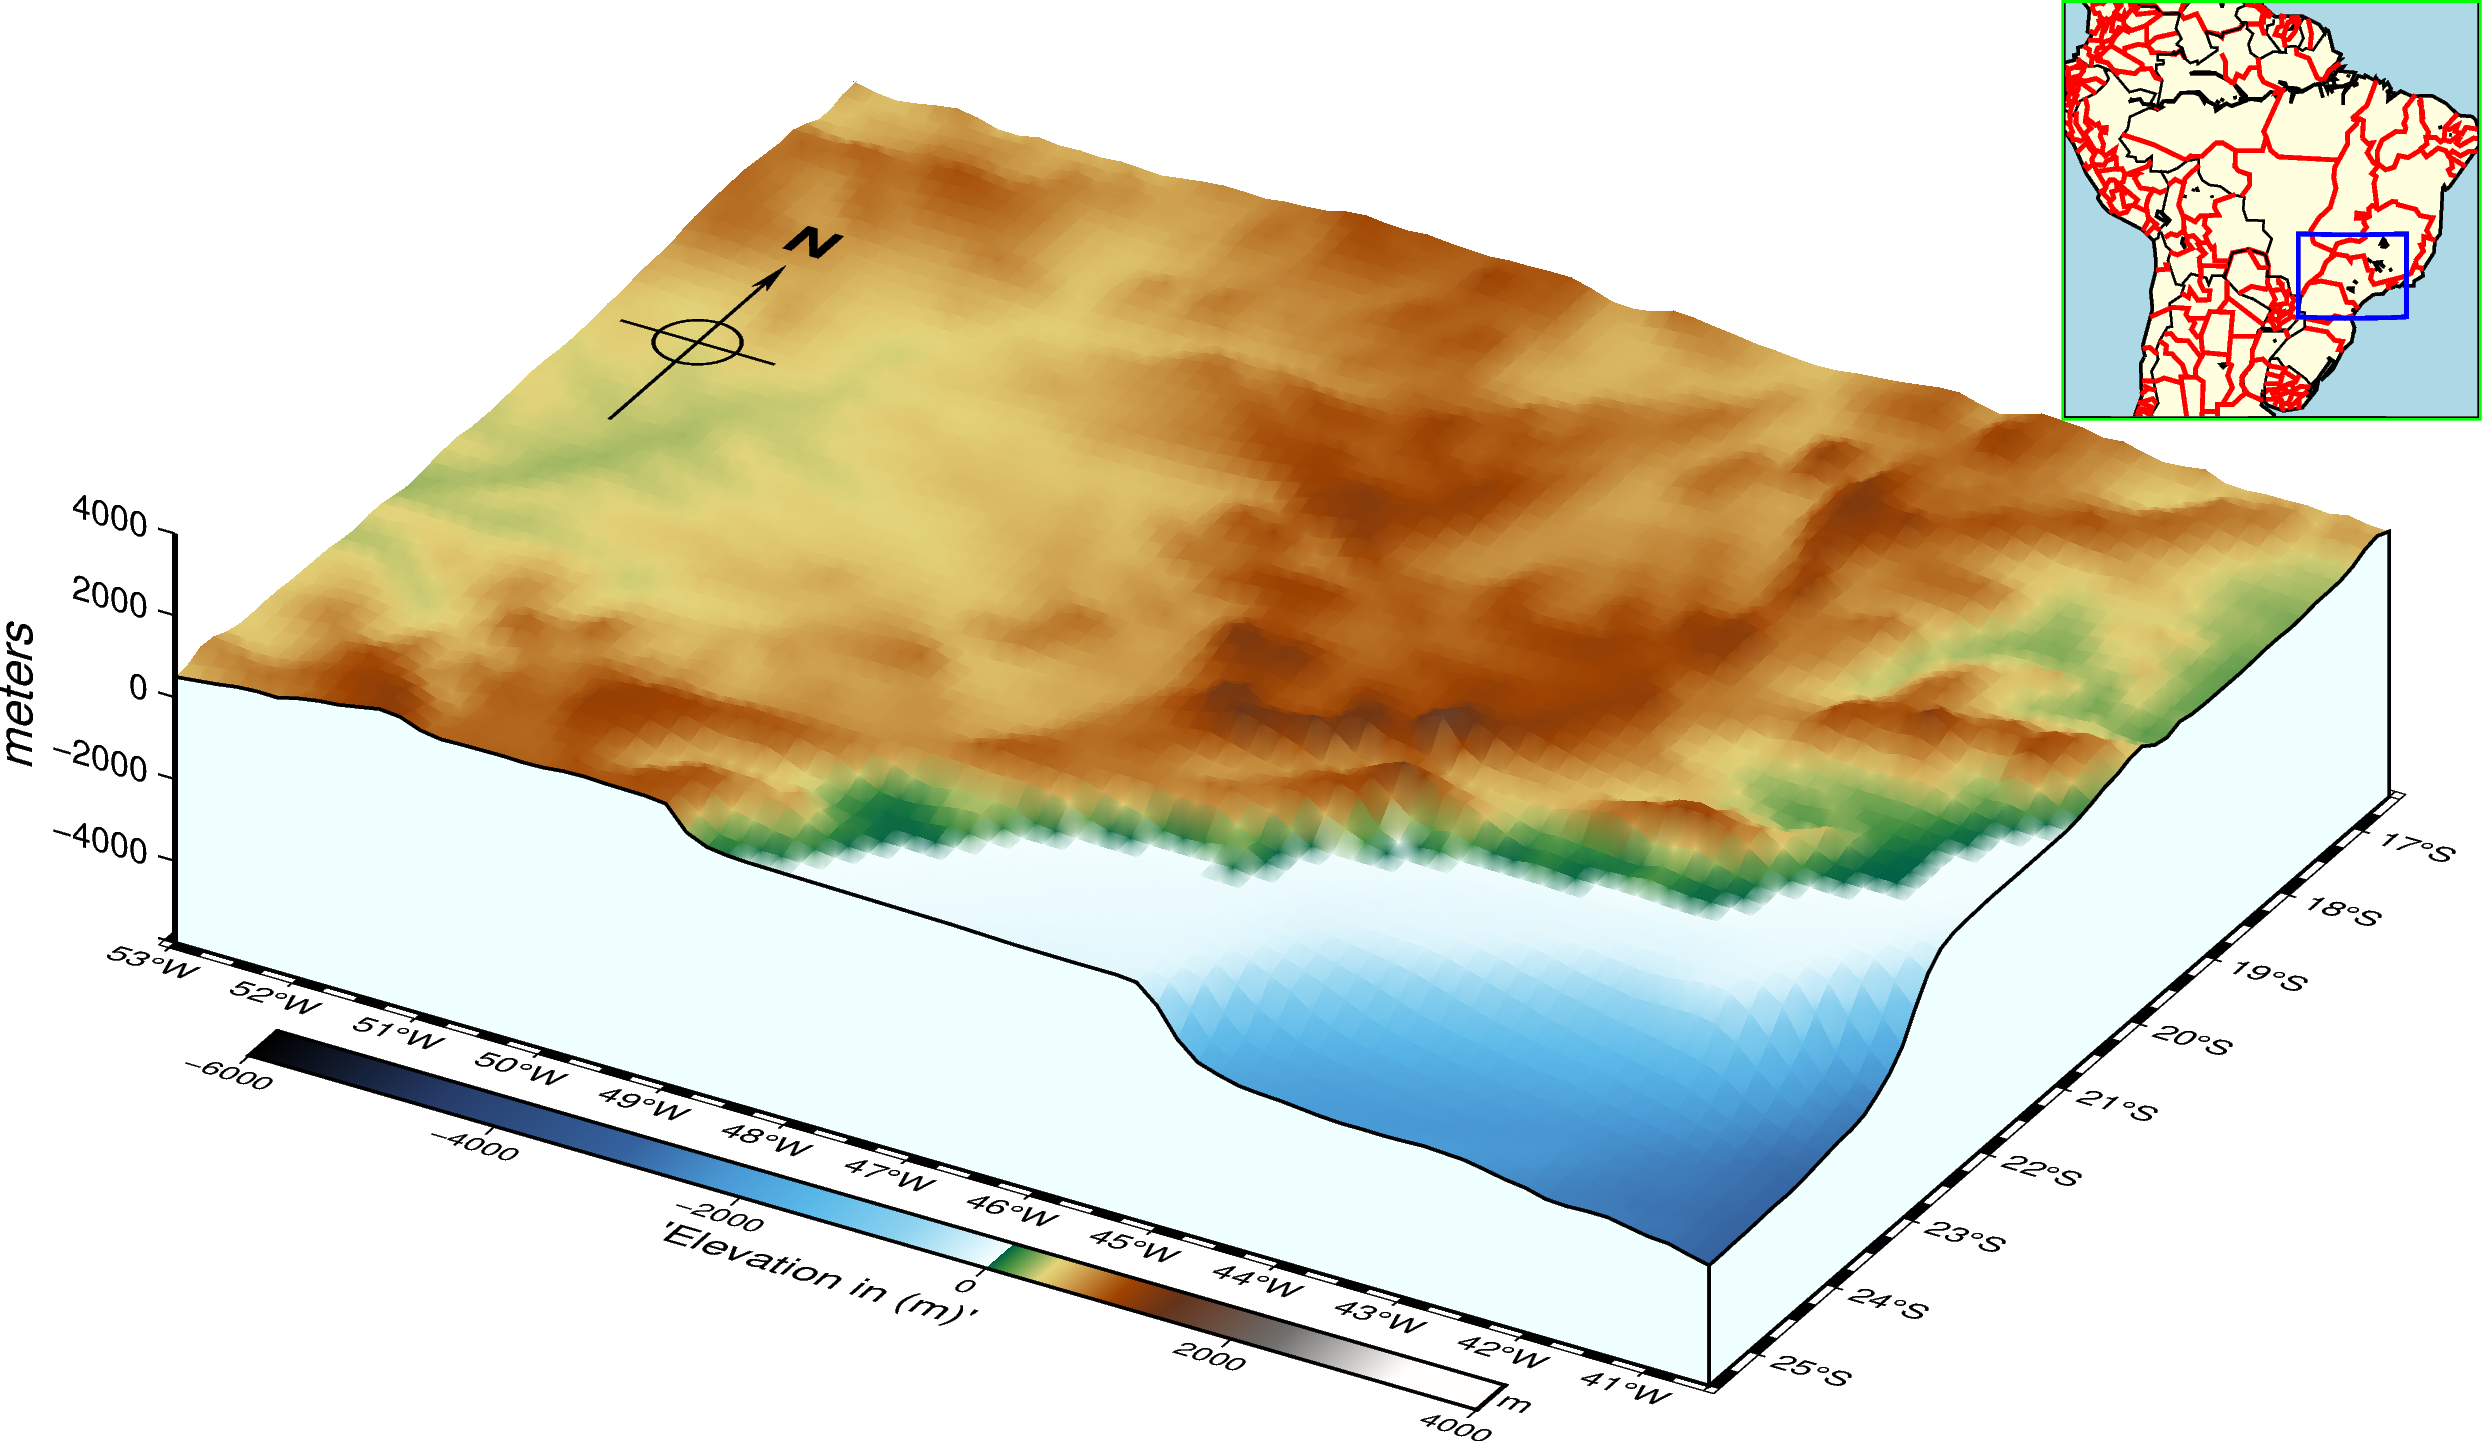

In [ ]:
#https://github.com/andrebelem/3D-Antarctic-maps

minlon, maxlon = -53., -40.5
minlat, maxlat = -25.5, -16.5
inset_region = [-80.,-35.,-35.5,10.]
inset_projection = "M3.5c"
region=[minlon, maxlon, minlat, maxlat]
#minlon, maxlon = 120., 122.1
#minlat, maxlat = 21.8, 25.6

grid = pygmt.datasets.load_earth_relief(resolution="10m", region=[-53., -40.5, -25.5, -16.5])

frame =  ["xa1f0.25","ya1f0.25", "z2000+lmeters", "wSEnZ"]

pygmt.makecpt(
        cmap='geo',
        series=f'-6000/4000/100',
        continuous=True
    )


fig = pygmt.Figure()
fig.grdview(
    grid=grid,
    region=[minlon, maxlon, minlat, maxlat, -6000, 4000],
    perspective=[150, 30],
    frame=frame,
    projection="M15c",
    zsize="4c",
    surftype="i",
    plane="-6000+gazure",
    #plane="-1000+ggray",
    shading=0,
    # Set the contour pen thickness to "1p"
    contourpen="2p",
)

fig.basemap(
    perspective=True,
    rose="jTL+w3c+l+o-2c/-1c",
    )


with fig.inset(position="jBR+w3.5c+o-4.5c/8.2c", margin=0, box="+pgreen"):
    fig.coast(
        region=inset_region,
        shorelines="thin",
        projection=inset_projection,
        land="lightyellow",
        water="lightblue",
        frame="a",
        borders=["1/0.5p,black", "2/1p,red", "3/0.5p,blue"]
    )
    rectangle = [[region[0], region[2], region[1], region[3]]]
    fig.plot(data=rectangle, style="r+s", pen="1p,blue")

fig.colorbar(perspective=True, frame=["a2000", "x+l'Elevation in (m)'", "y+lm"])
fig.savefig("topo-plot_3d.png", crop=True, dpi=300)
fig.show()


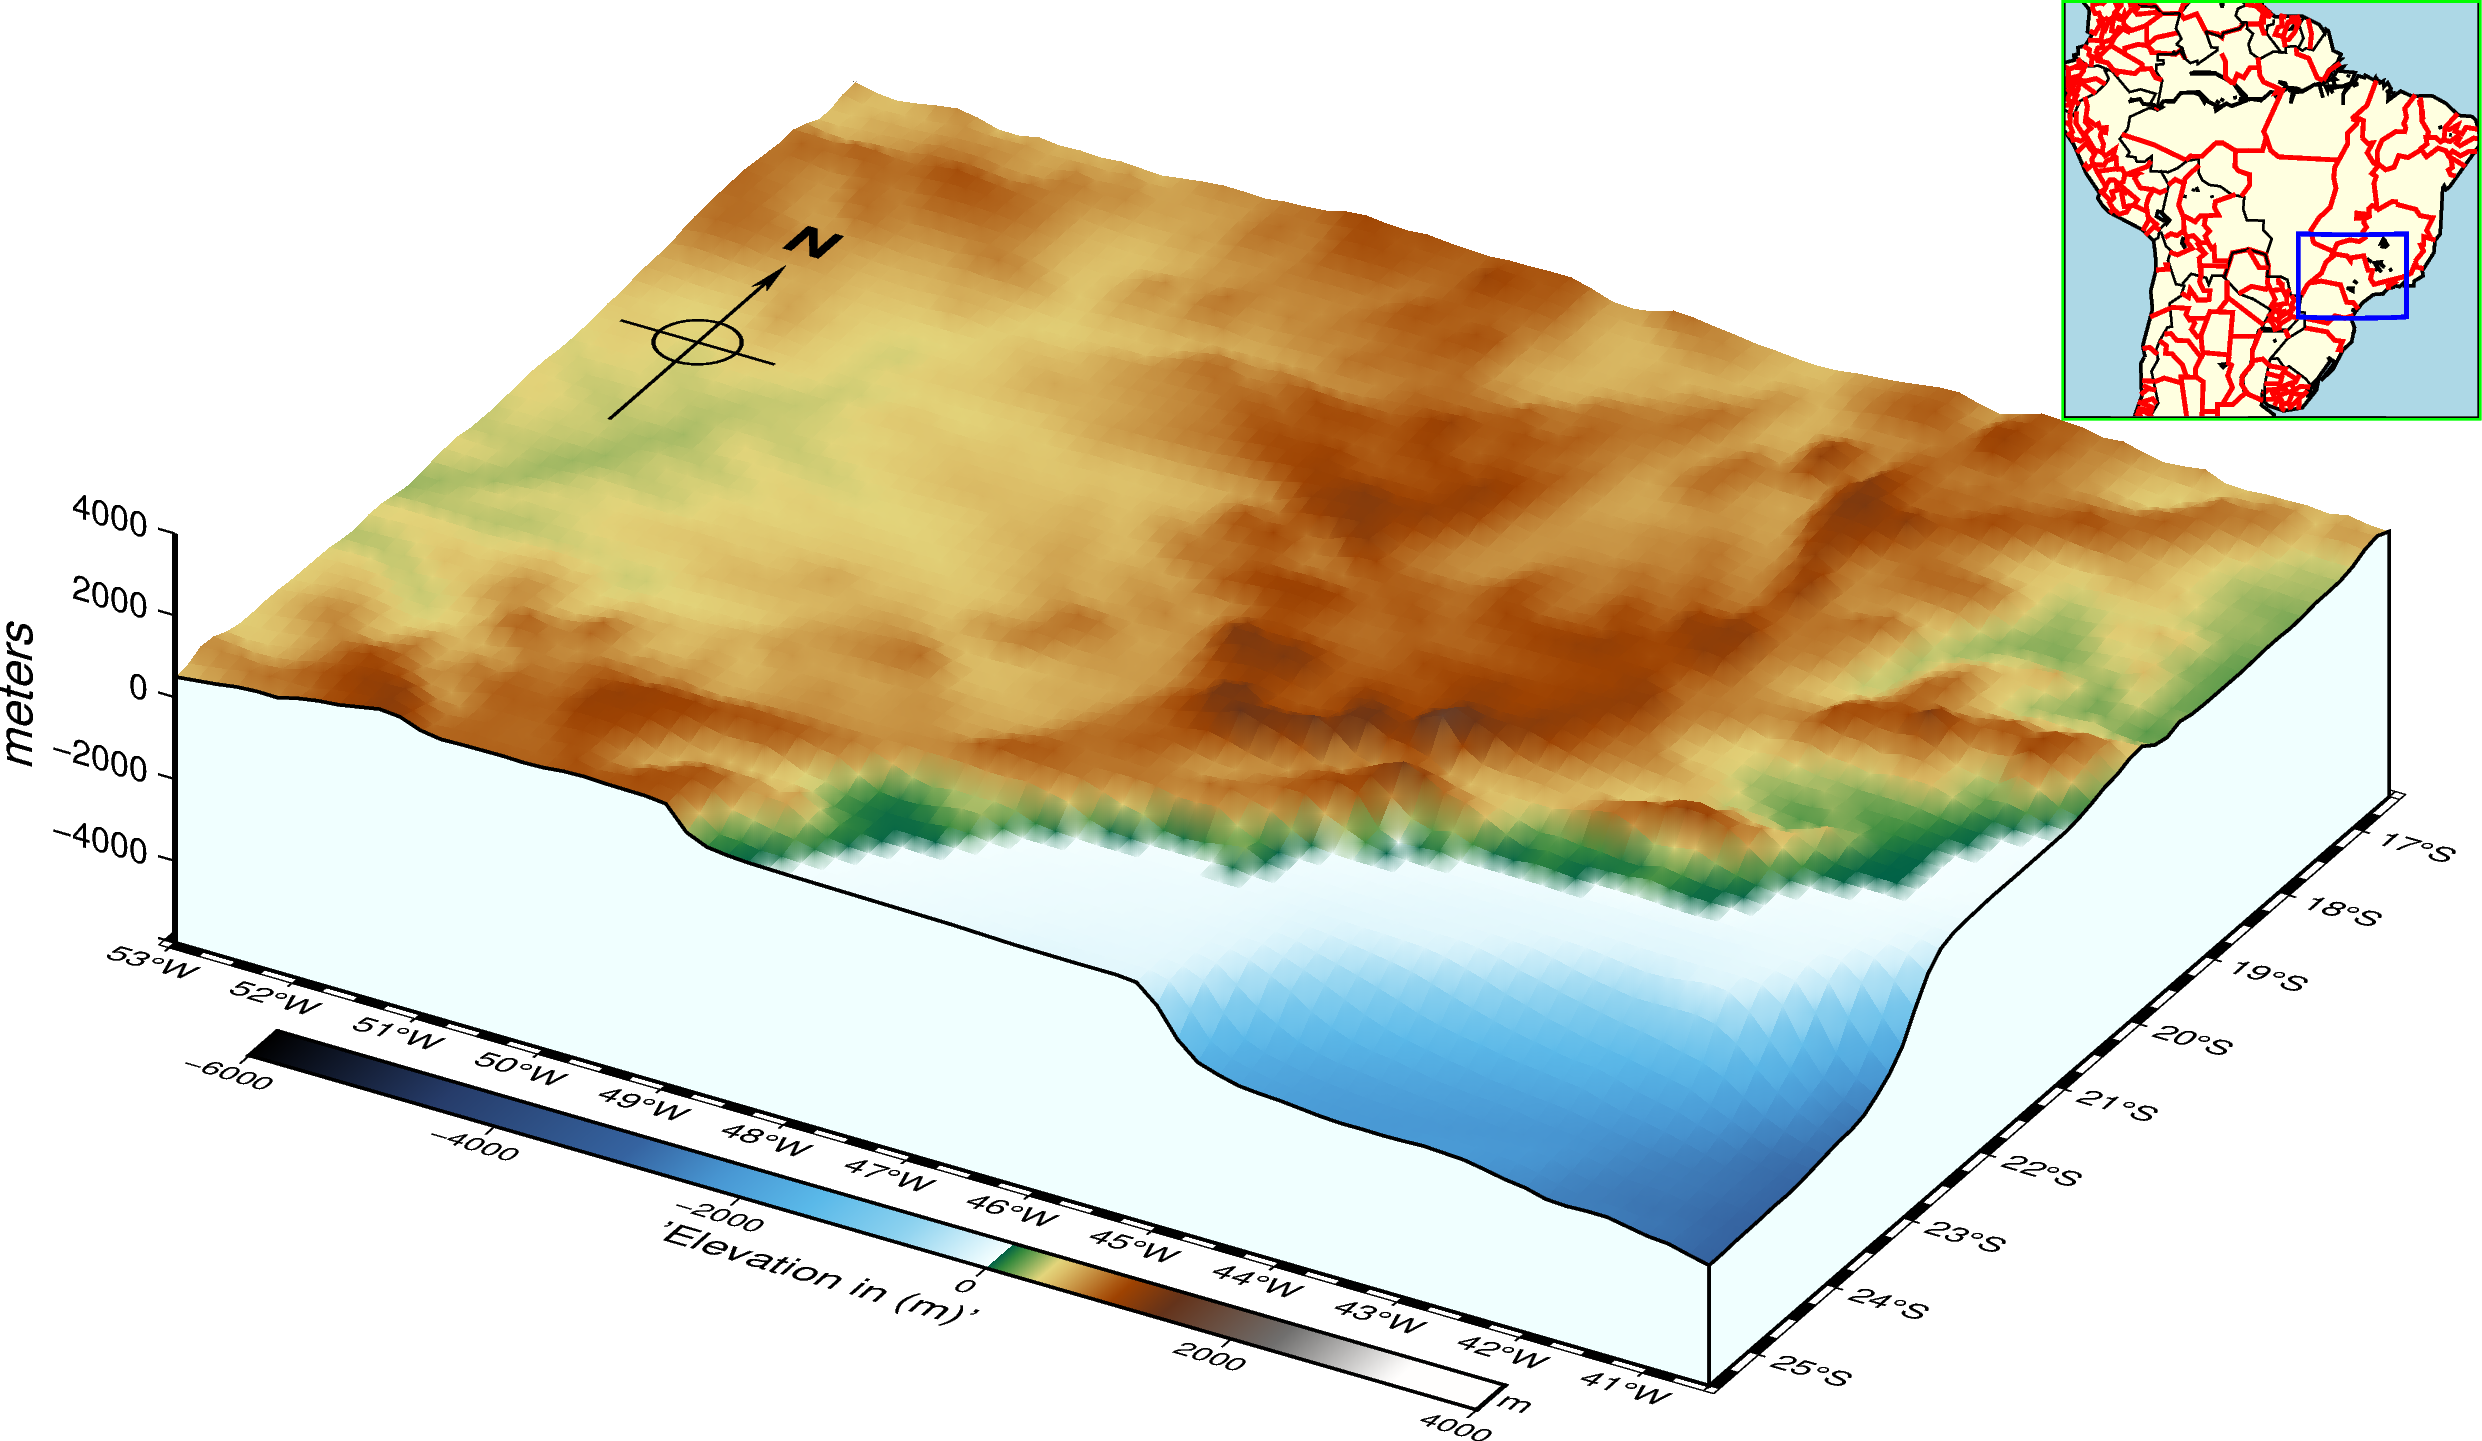

In [ ]:
#Definindo a altimetria em tres dim
fig.show()


In [ ]:
minlon, maxlon = -64, -54
minlat, maxlat = -7, 3

inset_region = [-80.,-35.,-35.5,10.]
inset_projection = "M3.5c"
region=[minlon, maxlon, minlat, maxlat]

fig = pygmt.Figure()
fig.basemap(frame=True, projection="M20c", region=[minlon, maxlon, minlat, maxlat])
pygmt.makecpt(
        cmap='geo',
        series=f'-6000/4000/100',
        continuous=True
    )

fig.grdimage(grid="@earth_relief_01s", shading=True) #03s
# Call the coast method for the plot
fig.coast(
    # Set the projection to Mercator, and plot size to 10 cm
    projection="M20c",
    # Set the region of the plot
    region=[minlon, maxlon, minlat, maxlat],
    # Set the frame of the plot
    frame="a",
    # Draw national borders with a 1-point black line
    borders=["1/0.5p,black", "2/1p,red", "3/0.5p,blue"],
)
#fig.basemap(frame=["a", "+Topografia Boa Vista - RO"])
with fig.inset(position="jBR+w3.5c+o15.5c/16c", margin=0, box="+pgreen"):
    fig.coast(
        region=inset_region,
        shorelines="thin",
        projection=inset_projection,
        land="lightyellow",
        water="lightblue",
        frame="a",
        borders=["1/0.5p,black", "2/1p,red", "3/0.5p,blue"]
    )
    rectangle = [[region[0], region[2], region[1], region[3]]]
    fig.plot(data=rectangle, style="r+s", pen="1p,blue")

fig.colorbar(frame=["a2000", "x+l'Elevation in (m)'", "y+lm"])
fig.text(text="ATTO-CAMPINA", x=-59.01, y=-2.10,font="18p,Helvetica-Bold,black")
fig.plot(x= -59.01, y= -2.10, style="c4.0c")
fig.savefig("topo-plot_3d.png", crop=True, dpi=600)
fig.show()

grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: Earth Relief at 1x1 arc seconds tiles provided by SRTMGL1 (land only) [NASA/USGS].
grdblend [NOTICE]:   -> Download 1x1 degree grid tile (earth_relief_01s_g): S07W064


grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: Earth Relief at 3x3 arc seconds tiles provided by SRTMGL3 (land only) [NASA/USGS].
grdblend [NOTICE]:   -> Download 1x1 degree grid tile (earth_relief_03s_g): S01W092


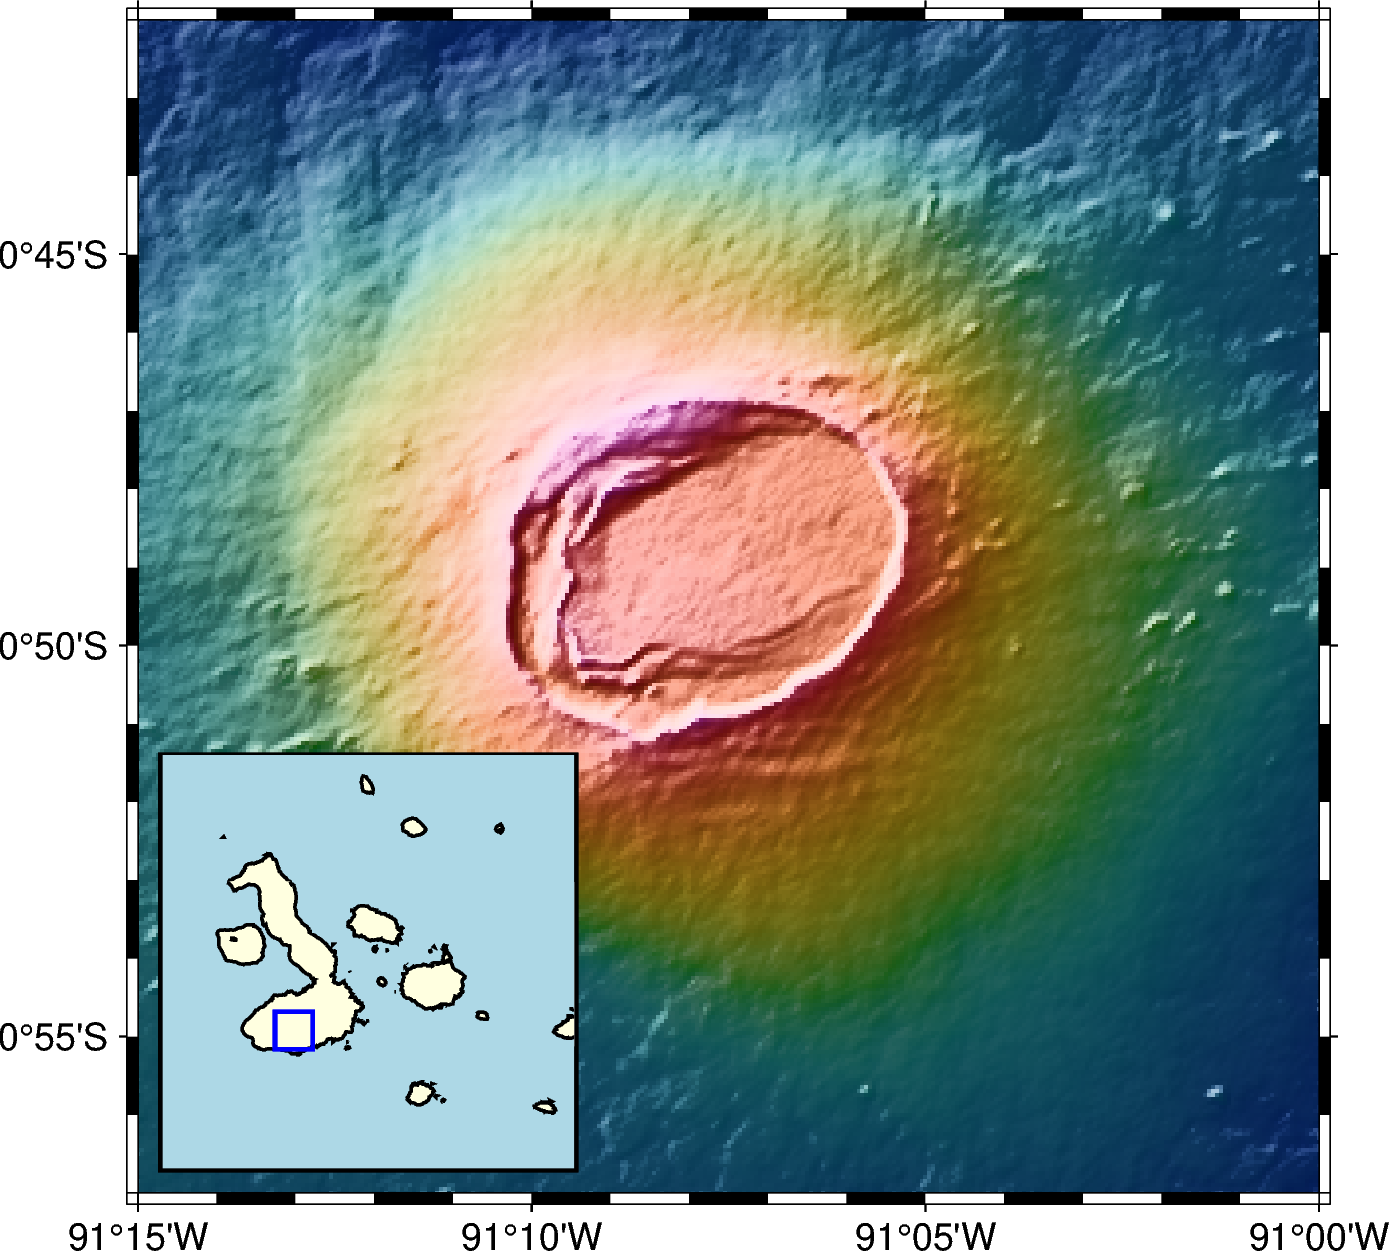

In [ ]:
import pygmt
region=[-35.35,-37.35,-10.50,-8.50]
inset_region = [-37.35,-39.35,-8.50,10.50]

region=[-91.25,-91,-0.95,-0.7]
inset_region = [-92,-89.5,-1.75,1]
inset_projection = "M3.5c"
data = pygmt.datasets.load_earth_relief(region=region, resolution='03s')
fig = pygmt.Figure()
pygmt.makecpt(cmap="batlow", series=[0, 1135])
fig.grdimage(
    grid=data,
    region=region,
    shading=True,
    cmap=True,
    frame=True,
    projection="M10c"
)
with fig.inset(position="jBL+w3.5c+o0.2c", box="+pblack"):
    fig.coast(
        region=inset_region,
        shorelines="thin",
        projection=inset_projection,
        land="lightyellow",
        water="lightblue",
        frame="a"
    )
    rectangle = [[region[0], region[2], region[1], region[3]]]
    fig.plot(data=rectangle, style="r+s", pen="1p,blue")
fig.show()

In [ ]:
# plotando para a minha regao de preferencia, temos:
fig.basemap(region=[-180, 180, -70, 70], projection="M20c", frame=True)
fig.show()